In [1]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [2]:
# Data creation
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)  # generate sample blobs

In [3]:
X = StandardScaler().fit_transform(X)
X[:5]

array([[ 0.49426097,  1.45106697],
       [-1.42808099, -0.83706377],
       [ 0.33855918,  1.03875871],
       [ 0.11900101, -1.05397553],
       [ 1.1224246 ,  1.77493654]])

In [4]:
# DBSCAN
db = DBSCAN(eps=0.2, min_samples=3).fit(X)

# Below code is for showcasing in diagram. Nothing related to model building

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)  # creating an array of true and false as the same size as db.labels

core_samples_mask[db.core_sample_indices_] = True  # setting the indices of the core regions to True

labels = db.labels_  # similar to the model.fit() method, it gives the labels of the clustered data

print (labels)

[ 0  1  0  2  0  1  1  2  0  0  1  1  1  2 -1  0 -1  1 -1  2  2  2  2  2
  1  1  2  0  0  2  0  1  1  0  1  0  2  0  0 -1  2  1  1  1  1  1  0  2
  0  1  2  2  1  1  2  2  1  0  2  1  2  2  2  2  2  0  2  2  0  0  0  2
  0  0  2  1  0  1  0  2  1  1  0  0  0  0  1  2  1  2  2  0  1  0  1 -1
  1  1  0  0  2  1  2  0  2  2  2  2  3  0 -1  1  1  1  1  0  0  1  0  1
  2  1  0  0  1  2  1  0  0  2  0  2  2  2  0 -1  2  2  0  1  0  2  0  0
  2  2 -1  2  1  3  2  1  1  2  2  2 -1  1  0  1  0  1  0  2  2  4  1  2
  2  1  0  1  2  2  2  1  1  2  2  0  1  2  0  0  2  0  0  1  0  1  0  1
  1  2  2  0  0  1  1  2  1  2  5  2  2  0  2  0  2  2  0  2  2  2  0  0
  1  1 -1  2  2  2  2  1  2  2  0  0  2  0  0  0  1  0  1  1  1  2  1  1
  0  1  2  2  1  2  2  1  0  0  1  1  1  0  1  0  2  0  2  5  2  2  2  1
  1  0  0  1  1  0  0  2  1 -1  2  1  1  2  1  2  0  2 -1  0  1  2  2  0
  2  2  0  0  2  0  2  0  2  1  0  0  0  1  2  1  2  2  0  2  2  0  0  2
  1  1  1  1  1  0  1  1  1 -1  0  0  1  1  1  0  2

In [5]:
# Number of clusters in labels, ignoring noise if present.

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) # the label -1 is considered as noise by the DBSCAN algorithm
n_noise_ = list(labels).count(-1)  # calculating the number of noises (-1)

In [7]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

print('Homogeneity: %0.3f'%metrics.homogeneity_score(labels_true, labels) )

Estimated number of clusters: 6
Estimated number of noise points: 24
Homogeneity: 0.956


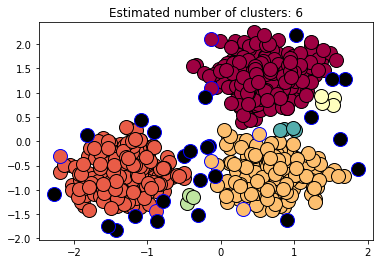

In [8]:
# Plot result
import matplotlib.pyplot as plt
# Black  is used for noise.
unique_labels = set(labels)  # identifying all the unique labels/clusters

colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]  # creating the list of colours, generating the colourmap



for k, col in zip(unique_labels, colors):
    
    
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)   # assigning class members for each class
    

    xy = X[class_member_mask & core_samples_mask] # creating the list of points for each class
    
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    

    xy = X[class_member_mask & ~core_samples_mask] # creating the list of noise points
    
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='b', markersize=14)
    
    

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### Finding counts in each cluster

In [9]:
np.unique(labels, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5], dtype=int64),
 array([ 24, 239, 237, 239,   4,   3,   4], dtype=int64))

### Select only noises or outliers for further action.

In [10]:
noises = X[labels == 4]

print (noises)

[[-0.46307453 -1.26531795]
 [-0.43185167 -1.10093485]
 [-0.37447929 -1.13624183]]
